In [1]:
# Import the packages
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
# Connect with the MongoDB Server
client = pymongo.MongoClient('localhost', 27017)
db = client['comp6235']
all_weather = db['all_weather']
london_historical_weather = db['london_historical_weather']
uk_energy = db['uk_energy']

## Average Temperature change in London Past  10 Years

In [4]:
# London Weather change over 10 years
query = [{'$match':{'city_name':{'$eq':'London'}}},
    {'$group':{'_id':{'$year':{'$toDate':'$date'}}, 'avg_max':{'$avg':'$max_temp_c'}}},
         {'$sort':{'_id':1}}
]

result = all_weather.aggregate(query)
df = pd.DataFrame(list(result))
df

,_id,avg_max
0,2013,14.845330
1,2014,16.362740
2,2015,15.719726
3,2016,15.453005
4,2017,15.646575
5,2018,16.280822
6,2019,15.906575
7,2020,16.455738
8,2021,15.206301
9,2022,17.279121


### Visualize the plot to show the result

Text(0, 0.5, 'Average Max Temperature')

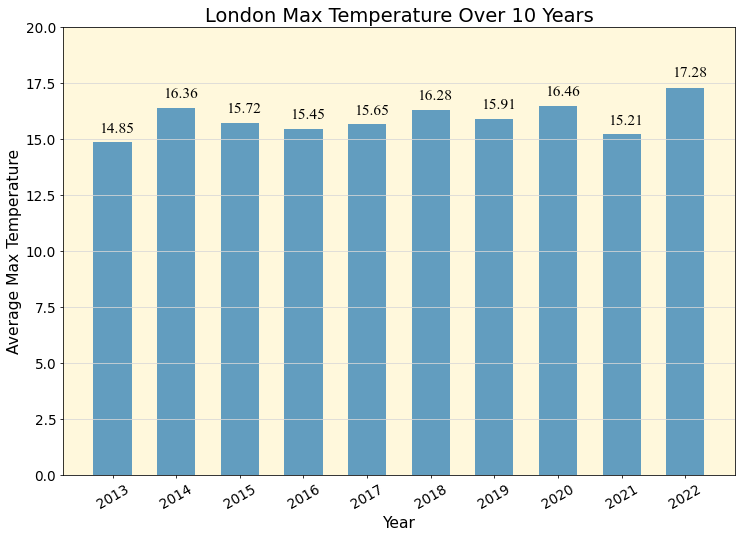

In [8]:
data = df.sort_values('_id')
data.columns=['Year', 'Average']

fig=plt.figure(figsize=(12,8),dpi=70)
plt.rcParams['axes.facecolor'] = '#FFF8DC'
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y",c=(217/256,217/256,217/256)) 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/3.5-0.08, 1.03*height, '%s' % round(float(height),2), size=16, family="Times new roman")

cm = plt.bar(data['Year'], data['Average'],width=0.6,align="center",label="Year", alpha=0.7)
autolabel(cm)

plt.title('London Max Temperature Over 10 Years', fontsize=20)
plt.xticks(range(2013,2023,1),rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Max Temperature', fontsize=16)

## London Temperature change over past 40 Years

In [193]:
query40 = [
    {
        "$set": {
            "date": {
                "$toDate": {
                    "$dateToString": {
                        "date": {"$dateFromParts": {"year": {"$floor": {"$divide": ["$date", 10000]}},"month": {"$floor": {"$mod": [{"$divide": ["$date", 100]}, 100]}},"day": {"$mod": ["$date", 100]}}},
                        "format": "%Y-%m-%d"
                    }
                }
            }
        }
    },
    {"$match": {"date": {"$gte": datetime(1981, 1, 1)}}},
    {'$group':{'_id':{'$year':{'$toDate':'$date'}}, 'avg':{'$avg':'$mean_temp'}}},
    {'$sort':{'_id':1}}
]

result40 = london_historical_weather.aggregate(query40)
df40 = pd.DataFrame(list(result40))
df40

,_id,avg
0,1981,10.320000
1,1982,10.998904
2,1983,11.237260
3,1984,10.942350
4,1985,10.095890
5,1986,9.998356
6,1987,10.287945
7,1988,10.873770
8,1989,12.095890
9,1990,12.083562


Text(0, 0.5, 'Average Temperature')

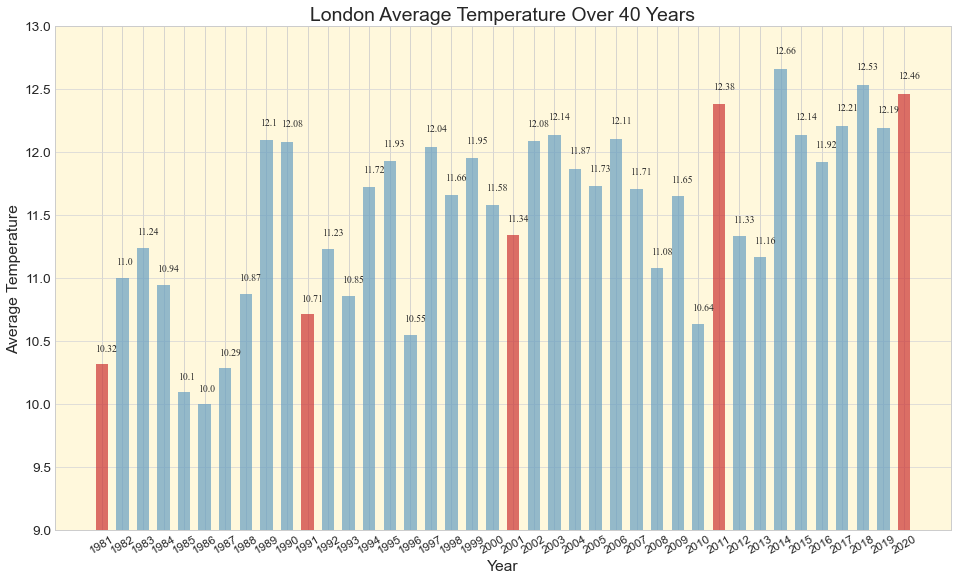

In [249]:
df40.columns=['Year', 'Average']

fig=plt.figure(figsize=(16,9),dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y",c=(217/256,217/256,217/256)) 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/5.5-0.08, 1.01*height, '%s' % round(float(height),2), size=10, family="Times new roman")

special_years = [1981, 1991, 2001, 2011, 2020]
colors = ['#CD3333' if year in special_years else '#679FC1' for year in df40['Year']]
cm = plt.bar(df40['Year'], df40['Average'],width=0.6,align="center",label="Year", alpha=0.7, color=colors)
autolabel(cm)

plt.title('London Average Temperature Over 40 Years', fontsize=20)
plt.xticks(range(1981, 2021, 1), rotation=30, fontsize=12)
plt.yticks(fontsize=14)
plt.ylim(9,13)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Temperature', fontsize=16)

## London Average Temperature change in different seasons

In [5]:
query1 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$project':{'_id':0, 'city_name':1, 'date':1, 'season':1, 'avg_temp_c':1}}
]

result1 = all_weather.aggregate(query1)
df1 = pd.DataFrame(list(result1))
df1

,city_name,date,season,avg_temp_c
0,London,2013-01-02,Winter,6.9
1,London,2013-01-03,Winter,10.6
2,London,2013-01-04,Winter,9.6
3,London,2013-01-05,Winter,9.2
4,London,2013-01-06,Winter,7.3
...,...,...,...,...
3645,London,2022-12-26,Winter,6.8
3646,London,2022-12-27,Winter,6.9
3647,London,2022-12-28,Winter,10.7
3648,London,2022-12-29,Winter,8.5


### Visualise the distribution of the result

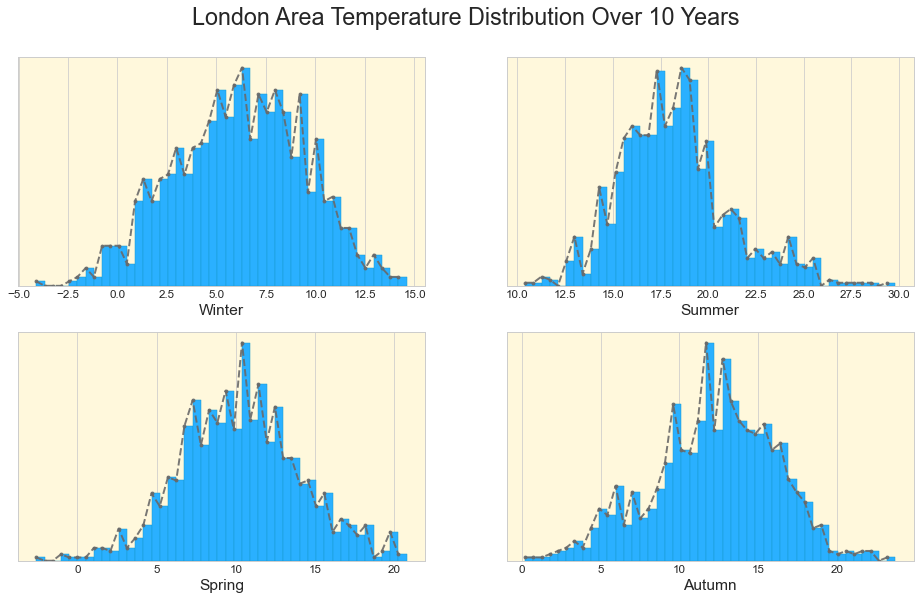

In [224]:
winter_data = df1[df1['season'] == 'Winter']
summer_data = df1[df1['season'] == 'Summer']
spring_data = df1[df1['season'] == 'Spring']
autumn_data = df1[df1['season'] == 'Autumn']

fig = plt.figure(figsize=(16, 9), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))
plt.style.use('seaborn-whitegrid')  # set the theme

plt.rcParams['axes.facecolor'] = '#FFF8DC'
plt.suptitle('London Area Temperature Distribution Over 10 Years', fontsize=24)

# Winter Frequency
plt.subplot(221)
n1, bins1, patches1 = plt.hist(winter_data['avg_temp_c'], bins=45, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5, label='Winter')
n1 = n1.astype('float')
plt.xticks(fontsize=12)
plt.yticks(())
plt.xlabel('Winter', fontsize=16)
plt.plot(bins1[:-1], n1, color='#696969', marker='.', linestyle='--', linewidth=2, alpha=0.9)

# Summer Frequency
plt.subplot(222)
n2, bins2, patches2 = plt.hist(summer_data['avg_temp_c'], bins=45, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5, label='Summer')
n2 = n2.astype('float')
plt.xticks(fontsize=12)
plt.yticks(())
plt.xlabel('Summer', fontsize=16)
plt.plot(bins2[:-1], n2, color='#696969', marker='.', linestyle='--', linewidth=2, alpha=0.9)

# Spring Frequency
plt.subplot(223)
n3, bins3, patches3 = plt.hist(spring_data['avg_temp_c'], bins=45, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5, label='Spring')
n3 = n3.astype('float')
plt.xticks(fontsize=12)
plt.yticks(())
plt.xlabel('Spring', fontsize=16)
plt.plot(bins3[:-1], n3, color='#696969', marker='.', linestyle='--', linewidth=2, alpha=0.9)

# Autumn Frequency
plt.subplot(224)
n4, bins4, patches4 = plt.hist(autumn_data['avg_temp_c'], bins=45, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5, label='Autumn')
n4 = n4.astype('float')  
plt.xticks(fontsize=12)
plt.yticks(())
plt.xlabel('Autumn', fontsize=16)
plt.plot(bins4[:-1], n4, color='#696969', marker='.', linestyle='--', linewidth=2, alpha=0.9)

plt.show()

## London Average Temperature Change in Different Seasons over 10 Years

In [7]:
query2 = [{'$match':{'city_name':{'$eq':'London'}}},
    {'$group':{'_id':[{'$year':{'$toDate':'$date'}}, '$season'], 'avg':{'$avg':'$avg_temp_c'}}},
          {'$sort':{'_id':1}}
]

result2 = all_weather.aggregate(query2)
df2 = pd.DataFrame(list(result2))
df2 = df2.join(pd.DataFrame(df2.pop('_id').tolist(),columns=['year', 'season']))
df2

,avg,year,season
0,12.041758,2013,Autumn
1,8.057609,2013,Spring
2,18.320652,2013,Summer
3,5.177528,2013,Winter
4,13.375824,2014,Autumn
5,11.409783,2014,Spring
6,17.877174,2014,Summer
7,6.866667,2014,Winter
8,12.276923,2015,Autumn
9,10.356522,2015,Spring


### Visualise the Line Chart to Show the Result

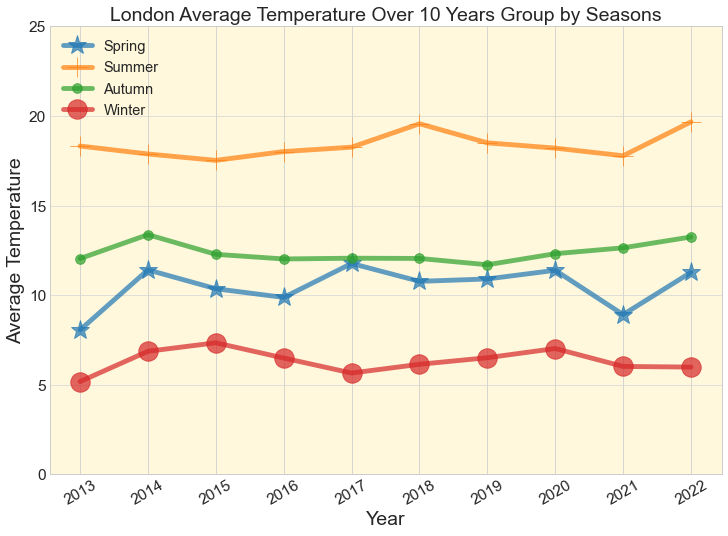

In [8]:
df2 = df2[['year', 'season', 'avg']]

fig=plt.figure(figsize=(12,8),dpi=70)
plt.rcParams['axes.facecolor'] = '#FFF8DC'
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y",c=(217/256,217/256,217/256)) 

winter = df2[df2['season']=='Winter']
winter_avg = winter['avg']
autumn = df2[df2['season']=='Autumn']
autumn_avg = autumn['avg']
summer = df2[df2['season']=='Summer']
summer_avg = summer['avg']
spring = df2[df2['season']=='Spring']
spring_avg = spring['avg']

plt.plot(data['Year'], spring_avg, label='Spring', linewidth=5, marker='*', markersize=20, alpha=0.7)
plt.plot(data['Year'], summer_avg, label='Summer', linewidth=5, marker='+', markersize=20, alpha=0.7)
plt.plot(data['Year'], autumn_avg, label='Autumn', linewidth=5, marker='.', markersize=20, alpha=0.7)
plt.plot(data['Year'], winter_avg, label='Winter', linewidth=5, marker='o', markersize=20, alpha=0.7)

plt.title('London Average Temperature Over 10 Years Group by Seasons', fontsize=20)
plt.xticks(range(2013,2023,1),rotation=30, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Temperature', fontsize=20)
plt.legend(fontsize=15)


##  London Extreme Weather Days

### Extreme High Temperature Count

In [10]:
percentile=95
query3 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$match':{'season':{'$eq':'Summer'}}},
    {
        "$group": {
            "_id": None,
            "avg_temp_c": {"$push": "$avg_temp_c"}  # store the data
        }
    },
    {
        "$project": {
            "avg_temp_c": 1,
            "p95_hot_value": {
                "$arrayElemAt": [
                    "$avg_temp_c",
                    {
                        "$floor": {
                            "$multiply": [percentile / 100, {"$size": "$avg_temp_c"}]
                        }
                    }
                ]
            }
        }
    }
]

result3 = all_weather.aggregate(query3)
p95_hot_value = list(result3)[0]['p95_hot_value']
print(p95_hot_value)

query4 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$match':{'max_temp_c':{'$gt':p95_hot_value}}},
    {'$group':{'_id':{'$year':{'$toDate':'$date'}}, 'extreme high temperature count':{'$sum':1}}},
    {'$sort':{'_id':1}}
]
result4 = all_weather.aggregate(query4)
df3 = pd.DataFrame(list(result4))
df3

23.7


,_id,extreme high temperature count
0,2013,50
1,2014,41
2,2015,31
3,2016,42
4,2017,33
5,2018,71
6,2019,49
7,2020,58
8,2021,31
9,2022,66


### Extreme Low Temperature Count

In [11]:
percentile=5
query5 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$match':{'season':{'$eq':'Winter'}}},
    {
        "$group": {
            "_id": None,
            "avg_temp_c": {"$push": "$avg_temp_c"}
        }
    },
    {
        "$project": {
            "avg_temp_c": 1,
            "p5_cold": {
                "$arrayElemAt": [
                    "$avg_temp_c",
                    {
                        "$floor": {
                            "$multiply": [percentile / 100, {"$size": "$avg_temp_c"}]
                        }
                    }
                ]
            }
        }
    }
]

result5 = all_weather.aggregate(query5)
p5_cold_value = list(result5)[0]['p5_cold']
print(p5_cold_value)

query6 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$match':{'avg_temp_c':{'$lt':p5_cold_value}}},
    {'$group':{'_id':{'$year':{'$toDate':'$date'}}, 'extreme low temperature count':{'$sum':1}}},
    {'$sort':{'_id':1}}
]
result6 = all_weather.aggregate(query6)
df4 = pd.DataFrame(list(result6))
df4

6.6


,_id,extreme low temperature count
0,2013,102
1,2014,45
2,2015,54
3,2016,80
4,2017,64
5,2018,75
6,2019,59
7,2020,56
8,2021,78
9,2022,59


### Combine Extreme Hot and Extreme Cold Weather List using Pie Chart

In [12]:
query7 = [
    {'$match':{'city_name':{'$eq':'London'}}},
    {'$group':{'_id':{'$year':{'$toDate':'$date'}}, 'day_count':{'$sum':1}}},
    {'$sort':{'_id':1}},
    {'$project':{'_id':0, 'day_count':1}}
]

result7 = all_weather.aggregate(query7)
df5 = pd.DataFrame(list(result7))
df5

,day_count
0,364
1,365
2,365
3,366
4,365
5,365
6,365
7,366
8,365
9,364


In [13]:
df6 = pd.DataFrame(
    {'_id':list(df4['_id']), 
     'day_count':list(df5['day_count']), 
     'extreme_cold_count':list(df4['extreme low temperature count']),
     'extreme_hot_count':list(df3['extreme high temperature count'])
    })
df6

,_id,day_count,extreme_cold_count,extreme_hot_count
0,2013,364,102,50
1,2014,365,45,41
2,2015,365,54,31
3,2016,366,80,42
4,2017,365,64,33
5,2018,365,75,71
6,2019,365,59,49
7,2020,366,56,58
8,2021,365,78,31
9,2022,364,59,66


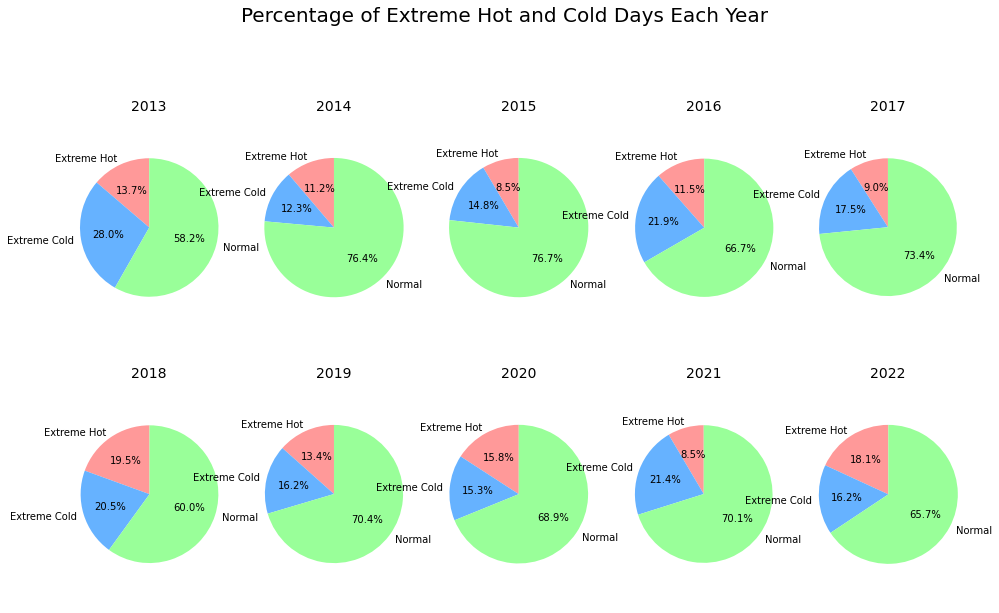

In [24]:
# Pie Charts

years=list(df6['day_count'])
extreme_hot_days=list(df6['extreme_hot_count'])
extreme_cold_days=list(df6['extreme_cold_count'])
total_days=list(df6['day_count'])

# Create subplot, each year has one chart
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 9))
fig.suptitle("Percentage of Extreme Hot and Cold Days Each Year", y=1.05, fontsize=20)

for i, year in enumerate(years):
    # Calculate the percentage in each year
    hot_percentage = extreme_hot_days[i] / total_days[i] * 100
    cold_percentage = extreme_cold_days[i] / total_days[i] * 100
    normal_percentage = (total_days[i] - extreme_hot_days[i] - extreme_cold_days[i]) / total_days[i] * 100

    # Draw the Pie Chart
    axs[i // 5, i % 5].pie([hot_percentage, cold_percentage, normal_percentage], labels=['Extreme Hot', 'Extreme Cold', 'Normal'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'])
    axs[i // 5, i % 5].axis('equal')  # Stay the Whole Circle
    axs[i // 5, i % 5].set_title(str(int(df6.iloc[i]['_id'])), fontsize=14)

# plt.tight_layout()

## Bar Chart shows the Ratio of changes

In [307]:
df6['last_year_cold'] = df6['extreme_cold_count'].shift(1)
df6['last_year_hot'] = df6['extreme_hot_count'].shift(1)
df6['cold_increase'] = round((df6['extreme_cold_count'] - df6['last_year_cold']) * 1.0 / df6['last_year_cold'], 3)
df6['hot_increase'] = round((df6['extreme_hot_count'] - df6['last_year_hot']) * 1.0 / df6['last_year_hot'], 3)
df6

,_id,day_count,extreme_cold_count,extreme_hot_count,last_year_cold,last_year_hot,cold_increase,hot_increase
0,2013,364,102,50,NaN,NaN,NaN,NaN
1,2014,365,45,41,102.0,50.0,-0.559,-0.180
2,2015,365,54,31,45.0,41.0,0.200,-0.244
3,2016,366,80,42,54.0,31.0,0.481,0.355
4,2017,365,64,33,80.0,42.0,-0.200,-0.214
5,2018,365,75,71,64.0,33.0,0.172,1.152
6,2019,365,59,49,75.0,71.0,-0.213,-0.310
7,2020,366,56,58,59.0,49.0,-0.051,0.184
8,2021,365,78,31,56.0,58.0,0.393,-0.466
9,2022,364,59,66,78.0,31.0,-0.244,1.129


### Visualize the Extreme Weather Data

posx and posy should be finite values
posx and posy should be finite values


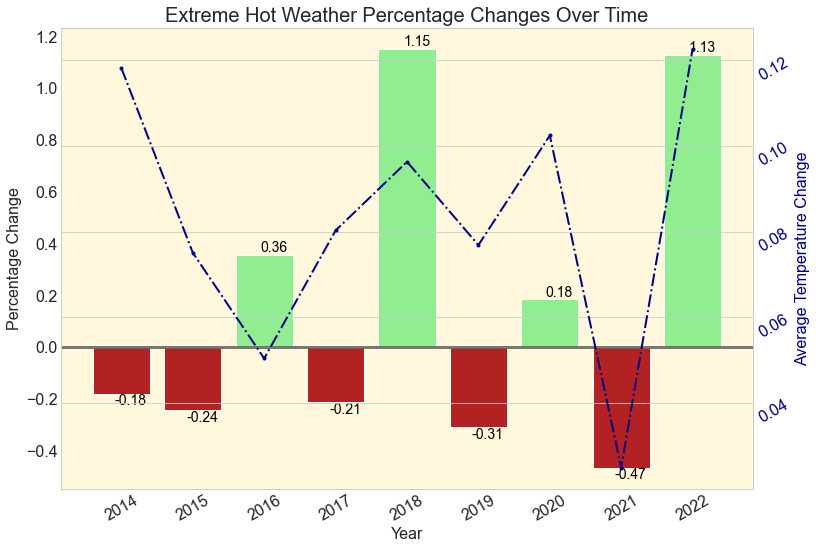

In [342]:
# Create a bar chart for extreme hot temperature
fig6, ax6 = plt.subplots(figsize=(12, 8))
plt.rcParams['axes.facecolor'] = '#FFF8DC'
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
ax6.tick_params(which='both', top=False, bottom=False, left=False, right=False)
ax6.axhline(0, color='#696969', linewidth=3, alpha=0.9)
ax6.grid(False)

# Create the bar chart
bars = ax6.bar(df6['_id'], df6['hot_increase'], color=np.where(np.array(df6['hot_increase']) < 0, '#B22222', '#90EE90'))

# Additional Info(Soecific numerical data)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/1.5, yval, round(yval, 2), ha='center', va='bottom' if yval > 0 else 'top', color='black', fontsize=14)

ax6.set_xlabel('Year', fontsize=16)
plt.xticks(range(2013,2023,1), fontsize=16, rotation=30)
ax6.set_ylabel('Percentage Change', fontsize=16)
plt.yticks(fontsize=16)
ax6.set_title('Extreme Hot Weather Percentage Changes Over Time', fontsize=20)

# Add the second Y-axis, to show other info
ax7 = ax6.twinx()
# Shows total average changes of temperature on the second Y-axis
df['increase'] = (df['avg'] - df['avg'].shift(1))*1.0/df['avg']
total_change = np.cumsum(df['increase'])
ax7.plot(df6['_id'], total_change, color='#000080', marker='.', linestyle='-.', linewidth=2)
ax7.set_ylabel('Average Temperature Change', color='#000080', fontsize=16)
plt.yticks(fontsize=16, rotation=30)
ax7.tick_params(axis='y', labelcolor='#000080')

posx and posy should be finite values
posx and posy should be finite values


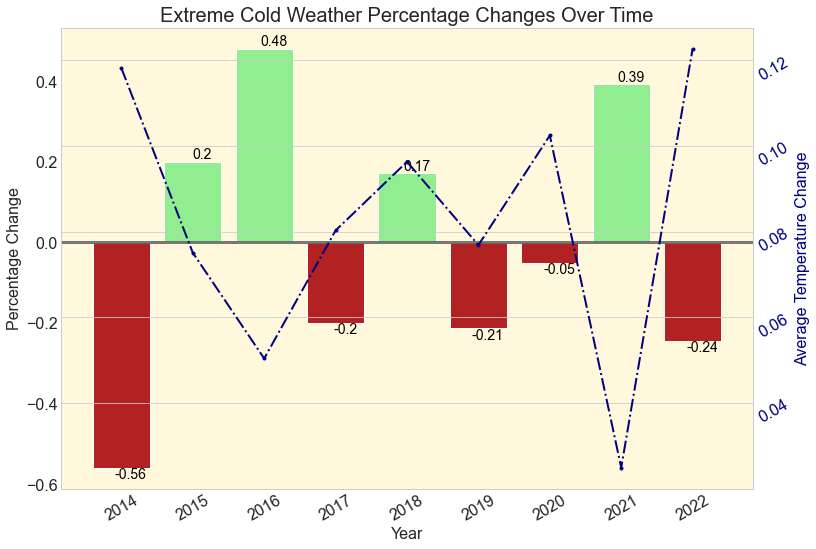

In [341]:
# For Extreme Cold Weather
fig8, ax8 = plt.subplots(figsize=(12, 8))
plt.rcParams['axes.facecolor'] = '#FFF8DC'
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
ax8.tick_params(which='both', top=False, bottom=False, left=False, right=False)
ax8.axhline(0, color='#696969', linewidth=3, alpha=0.9)
ax8.grid(False)

bars = ax8.bar(df6['_id'], df6['cold_increase'], color=np.where(np.array(df6['cold_increase']) < 0, '#B22222', '#90EE90'))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/1.5, yval, round(yval, 2), ha='center', va='bottom' if yval > 0 else 'top', color='black', fontsize=14)

ax8.set_xlabel('Year', fontsize=16)
plt.xticks(range(2013,2023,1), fontsize=16, rotation=30)
ax8.set_ylabel('Percentage Change', fontsize=16)
plt.yticks(fontsize=16)
ax8.set_title('Extreme Cold Weather Percentage Changes Over Time', fontsize=20)

ax9 = ax8.twinx()

df['increase'] = (df['avg'] - df['avg'].shift(1))*1.0/df['avg']
total_change = np.cumsum(df['increase'])
ax9.plot(df6['_id'], total_change, color='#000080', marker='.', linestyle='-.', linewidth=2)
ax9.set_ylabel('Average Temperature Change', color='#000080', fontsize=16)
plt.yticks(fontsize=16, rotation=30)
ax9.tick_params(axis='y', labelcolor='#000080')